# Lasso
- シンプルな線形回帰ですが、非常に分かり易くて便利です

In [2]:
#ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#データ読み込み
df=pd.read_csv("muki.csv")

In [4]:
df

,name,polytyp,Tc,ref,author,link,comment,polytyp2,C_R,C_T,vol_per_atom,Z,f4,d5,L4f,S4f,J4f,(g-1)J4f,(2-g)J4f
0,Ce2Co17,Th2Zn17,1100.0,"JOURNAL OF APPLIED PHYSICS 85, 4666 (1999)","Bao-gen Shen, et al.",NaN,NaN,Th2Zn17,0.008054,0.068461,13.069350,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
1,Ce2Co7,Ce2Ni7,123.0,"Reports on Progress in Physics, 40, 1179 (1977)",K H J Buschow,NaN,NaN,Ce2Ni7,0.015191,0.053168,14.628752,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
2,Ce5Co19,NaN,293.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CeCo2,NaN,0.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CeCo3,NaN,78.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CeCo5,NaN,653.0,"PHYSICAL REVIEW APPLIED 11, 014052 (2019)",Tej N. Lamichhane et al.,NaN,NaN,CaCu5,0.011834,0.059168,14.084152,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
6,Dy2Co17,Th2Ni17,1183.0,"Journal of Alloys and Compounds, 264, 19 (1998).","Shao-ying Zhang, et al.,",https://doi.org/10.1016/S0925-8388(97)00230-2,NaN,Th2Ni17,0.008158,0.069346,12.902564,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
7,Dy3Co,NaN,44.0,"Applied Physics A 99, 853 (2010)",Jun Shen et al.,NaN,NaN,Fe3C,0.029131,0.009710,25.745848,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
8,DyCo2,MgCu2,136.0,"Journal of Alloys and Compounds, 777, 152 (2019)","C.L.Wang, et al.",NaN,NaN,MgCu2,0.021469,0.042938,15.526094,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
9,DyCo3,PuNi3,450.0,"journal of physical society of japan 58, 3431 ...",Hiroshi Yoshie and Yoji Nakamura,NaN,NaN,PuNi3,0.017077,0.051231,14.639594,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000


In [5]:
#使うカラムを指定する
df=df[["Tc",'C_R', 'C_T', 'vol_per_atom', 'Z', 'f4', 'd5', 'L4f', 'S4f', 'J4f',
       '(g-1)J4f', '(2-g)J4f']]

In [6]:
#欠損(NaN)が含まれるレコードを消す 
df=df.dropna()

In [7]:
#x,yの設定

#Xには説明変数を設定する
X=df[['C_R', 'C_T', 'vol_per_atom', 'Z', 'f4', 'd5', 'L4f', 'S4f', 'J4f',
       '(g-1)J4f', '(2-g)J4f']]

#Yには目的変数を設定する
Y=df[["Tc"]]

# X,Yを正規化します
- 殆どの回帰モデル(除 Random forest系)は、X,Yを正規化した方が正しく回帰出来ます
- 正規化: 平均が0、標準偏差が1になるように変換すること 
- 今回はX、Yをそれぞれsc_X、sc_Yに正規化して代入します

In [8]:
#StandardScalerを使えば一発正規化できます
from sklearn.preprocessing import StandardScaler

#X
X_scaler=StandardScaler()
sc_X=X_scaler.fit_transform(X)

#Y
Y_scaler=StandardScaler()
sc_Y=Y_scaler.fit_transform(Y)

# Lassoで回帰します
- ハイパーパラメータalphaを変えると回帰の結果が色々と変わります

,0,1
0,C_R,-1.28462
1,C_T,-0
2,vol_per_atom,0.386829
3,Z,0
4,f4,0.0987759
5,d5,-0
6,L4f,-0
7,S4f,0.20519
8,J4f,-0.00334117
9,(g-1)J4f,-0.0383663


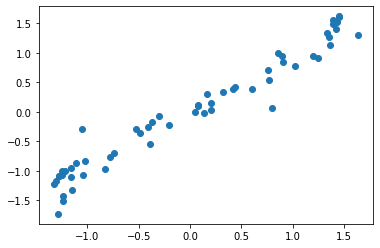

In [9]:
from sklearn.linear_model import Lasso

model=Lasso(alpha=0.01)
model.fit(sc_X,sc_Y)

#結果の予測
pred_Y=model.predict(sc_X)
plt.scatter(sc_Y,pred_Y)

#回帰係数
model.coef_
pd.DataFrame([X.columns,model.coef_]).T

,0,1
0,C_R,-0.42114
1,C_T,0
2,vol_per_atom,-0
3,Z,-0
4,f4,-0
5,d5,0
6,L4f,-0
7,S4f,0
8,J4f,-0
9,(g-1)J4f,0


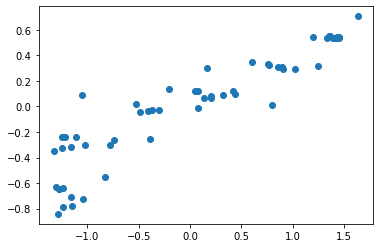

In [10]:
model=Lasso(alpha=0.5)
model.fit(sc_X,sc_Y)

#結果の予測
pred_Y=model.predict(sc_X)
plt.scatter(sc_Y,pred_Y)

#回帰係数
model.coef_
pd.DataFrame([X.columns,model.coef_]).T